In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# List found classes
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Creating session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Display Measurement first record
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1129fd0f0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [12]:
# Display Station first record
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1129fdf28>,
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [13]:
# last data point in the database
max_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
max_date_str

'2017-08-23'

In [14]:
# last data point in the database as a date
max_date = dt.date(int(session.query(func.strftime("%Y",Measurement.date)).\
                       order_by(Measurement.date.desc()).first()[0]),
                   int(session.query(func.strftime("%m",Measurement.date)).\
                       order_by(Measurement.date.desc()).first()[0]),
                   int(session.query(func.strftime("%d",Measurement.date)).\
                       order_by(Measurement.date.desc()).first()[0]))
max_date

datetime.date(2017, 8, 23)

In [15]:
print(max_date)

2017-08-23


In [16]:
# Calculate the date 1 year ago from the last data point in the database
year_ago_date = max_date - dt.timedelta(days=365)
print(year_ago_date)

2016-08-23


In [17]:
# Alternate method to calculate the date 1 year ago from the last data point in the database
from datetime import datetime as dt2
print(dt2.strptime(max_date_str,'%Y-%m-%d') - dt.timedelta(days = 365))

2016-08-23 00:00:00


In [18]:
# Retrieving the data and precipitation scores
results1 = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date>='2016-08-23', Measurement.date<='2017-08-23').\
            order_by(Measurement.date).all()

for result in results1[:10]:
    print(result)

('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', None)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)


In [19]:
# Noticed missing prcp values. Retrieving the data and precipitation scores and removing records with missing prcp
results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date>='2016-08-23', Measurement.date<='2017-08-23', Measurement.prcp != 'None').\
            order_by(Measurement.date).all()

for result in results[:10]:
    print(result)

('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', 1.22)


In [20]:
# Saving query results as a Pandas DataFrame
df = pd.DataFrame(results, columns=['date', 'precipitation']).sort_values("date")
df.set_index('date', inplace=True)
df.head(10)

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [21]:
#Noticed several records per day. Grouping by date and calculating total precipitation
grp_df = df.groupby("date")
prcp_grp_df = pd.DataFrame({"precipitation" : grp_df["precipitation"].sum()}).sort_values("date")
prcp_grp_df.head(10)

,precipitation
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10
2016-08-29,1.46
2016-08-30,0.07
2016-08-31,3.18


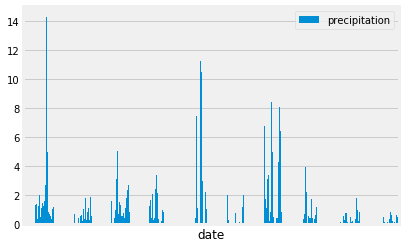

In [22]:
# df.plot(kind="bar")
prcp_grp_df.plot(kind="bar")
plt.xticks([])
plt.show()

![precipitation](Images/precipitation.png)

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [24]:
# Summary stats for total precipitation per day data
prcp_grp_df.describe()

,precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


In [25]:
# Summary stats for ungrouped precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [26]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [27]:
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [29]:
session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# excluding records with missing prcp
# count totals are somewhat different. Affecting ranking for 2nd, and 3rd place.
session.query(Measurement.station,func.count(Measurement.station)).\
filter(Measurement.prcp != 'None').\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [32]:
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).all()

[(54.0, 85.0, 71.66378066378067)]

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [34]:
# last data point for station = "USC00519281" in the database
session.query(Measurement.date).\
            filter(Measurement.station == "USC00519281").order_by(Measurement.date.desc()).first()[0]

'2017-08-18'

In [35]:
results_tobs = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.station == "USC00519281").\
            filter(Measurement.date>='2016-08-18', Measurement.date<='2017-08-18').\
            order_by(Measurement.date).all()
for result in results_tobs[:10]:
    print(result)

('2016-08-18', 80.0)
('2016-08-19', 79.0)
('2016-08-20', 81.0)
('2016-08-21', 79.0)
('2016-08-22', 78.0)
('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)


In [36]:
df_tobs = pd.DataFrame(results_tobs, columns=['date', 'tobs'])
df_tobs.set_index('date', inplace=True)
df_tobs.head(10)

,tobs
date,
2016-08-18,80.0
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0


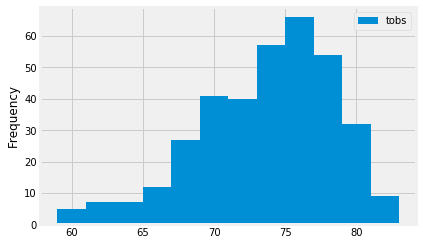

In [37]:
df_tobs.plot(kind="hist",bins=12)
plt.show()

![precipitation](Images/station-histogram.png)

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip = calc_temps('2017-08-10', '2017-08-23')
trip

[(70.0, 78.71428571428571, 85.0)]

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [41]:
df_trip = pd.DataFrame(trip, columns=['tmin', 'tavg', 'tmax'])
df_trip

,tmin,tavg,tmax
0,70.0,78.714286,85.0


In [42]:
ptp = trip[0][2]-trip[0][0]
ptp

15.0

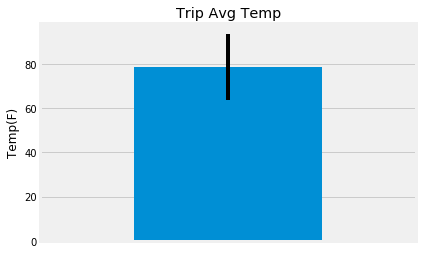

In [43]:
df_trip['tavg'].plot(kind="bar",yerr=ptp)
plt.xticks([])
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.show()

In [44]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
results_station = session.query(*sel,func.sum(Measurement.prcp)).\
            filter(Measurement.station == Station.station).\
            filter(Measurement.date>='2017-08-10', Measurement.date<='2017-08-23', Measurement.prcp != 'None').\
            group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

for result in results_station:
    print(result)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 3.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.51)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.34)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.04)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02)


## Optional Challenge Assignment

In [45]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [46]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [47]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [48]:
# Plot the daily normals as an area plot with `stacked=False`
